In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ----------------------------
# 1. DEVICE CONFIGURATION
# ----------------------------
# 1. CONFIGURAZIONE DISPOSITIVO
# ----------------------------

In [17]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


# ----------------------------
# 2. DATA LOADING & TRANSFORMS
# ----------------------------
# 2. CARICAMENTO E TRASFORMAZIONE DEI DATI
# ----------------------------


In [18]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Download MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# ----------------------------
# 3. DEFINE THE CNN MODEL
# ----------------------------
# 3. DEFINISCI LA RETE NEURALE CONVOLUZIONALE
# ----------------------------


In [19]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # (28 x 28) -> (28 x 28)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # (28 x 28) -> (28 x 28)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)                   # (28 x 28) -> (14 x 14)
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 classes for digits 0-9

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten layer
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    

# Initialize the model
model = CNN().to(device)


# ----------------------------
# 4. DEFINE LOSS AND OPTIMIZER
# ----------------------------
# 4. DEFINISCI FUNZIONE DI COSTO E OTTIMIZZATORE
# ----------------------------

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# ----------------------------
# 5. TRAINING LOOP
# ----------------------------
# 5. CICLO DI ALLENAMENTO
# ----------------------------


In [ ]:
from tqdm import tqdm
num_epochs = 5
train_losses = []

for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')


  0%|          | 0/5 [00:00<?, ?it/s]

# ----------------------------
# 6. EVALUATION
# ----------------------------
# 6. VALUTAZIONE
# ----------------------------


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


Test Accuracy: 98.86%


# ----------------------------
# 7. VISUALIZE TRAINING LOSS
# ----------------------------
# 7. VISUALIZZA LA FUNZIONE DI PERDITA DURANTE L'ALLENAMENTO
# ----------------------------


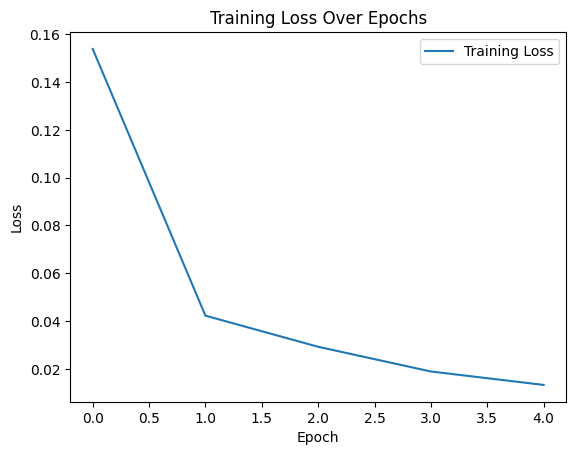

In [ ]:
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ----------------------------
# 8. TEST EXAMPLES
# ----------------------------
# 8. ESEMPI DI TEST
# ----------------------------

In [ ]:
import numpy as np

model.eval()
not_correct = []
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

for i,item in enumerate(range(len(predicted))):
    if predicted[i] != labels[i]:
        not_correct.append((images[i], labels[i], predicted[i]))


# Plot some test images with predictions
plt.figure(figsize=(12, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(not_correct[i][0].cpu().numpy().squeeze(), cmap='gray')
    plt.title(f"Predicted: {not_correct[i][1].item()} Real: {not_correct[i][2].item()}")
    plt.axis('off')
plt.show()

RuntimeError: Boolean value of Tensor with more than one value is ambiguous